<a href="https://colab.research.google.com/github/jhkr1/Practical-Al-Natural-Language-Processing/blob/main/SVD(Singular_Value_Decomposion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]])
A

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

# 1. 특이값 분해

In [3]:
U, s, VT = np.linalg.svd(A)

print("U:\n {}".format(U))
print("s:\n {}".format(s))
print("VT:\n {}".format(VT))

U:
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]]
s:
 [3.         2.23606798 2.         0.        ]
VT:
 [[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [ 0.         -1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


# 2. 이미지에 적용한 특이값 분해

Size(dimension):  (340, 255)


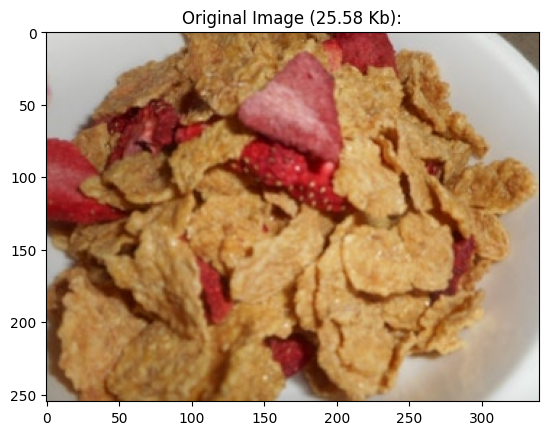

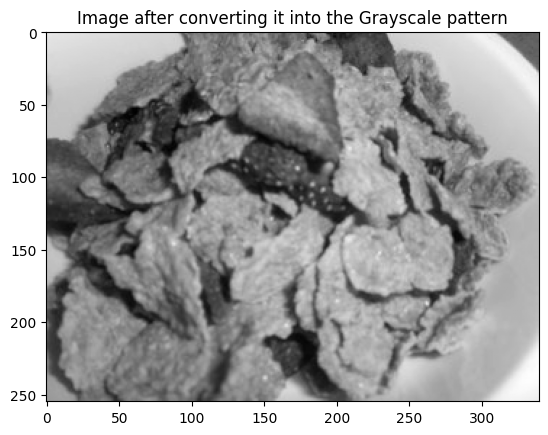

After compression: 


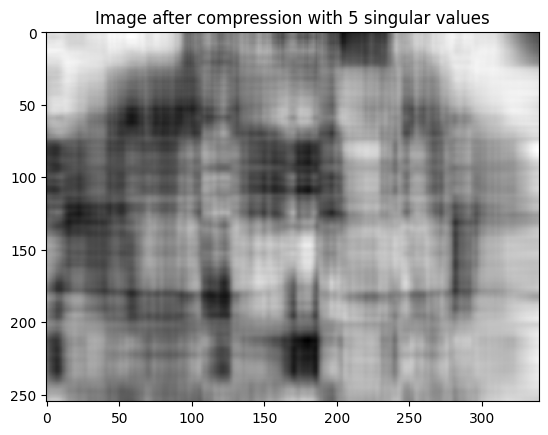

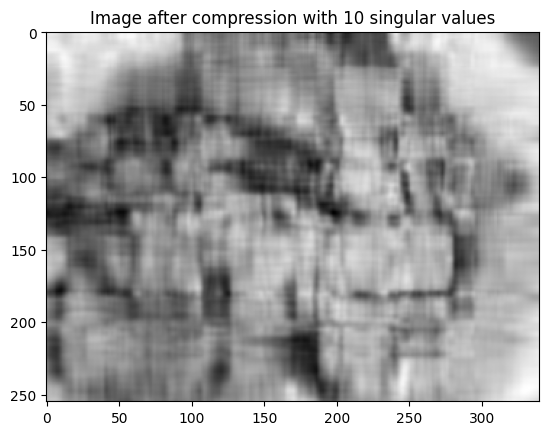

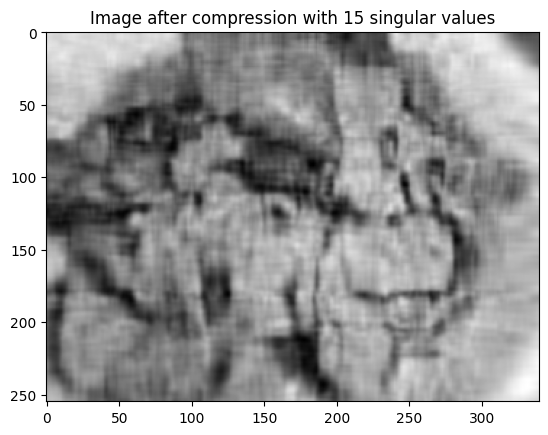

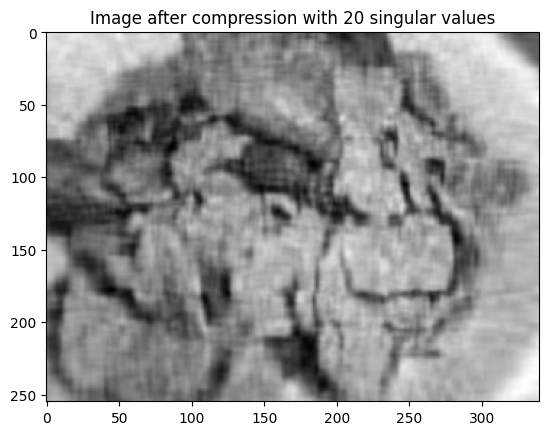

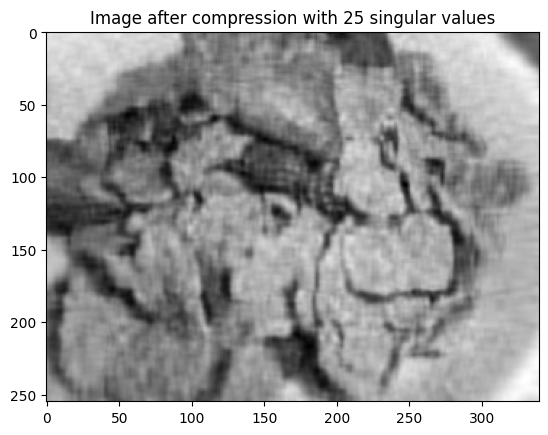

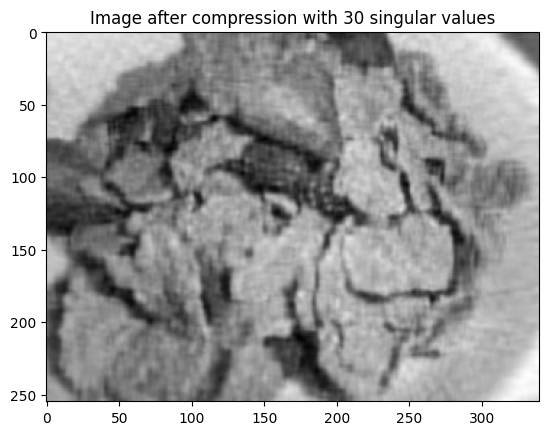

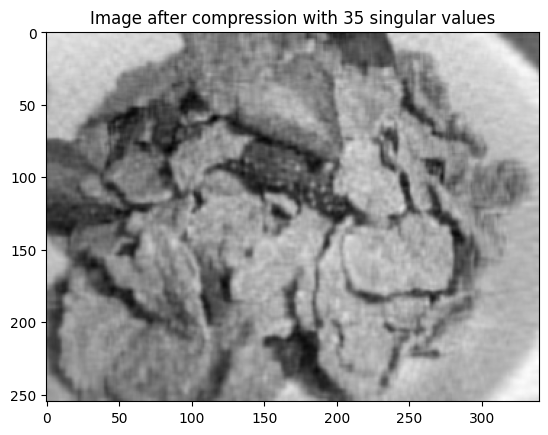

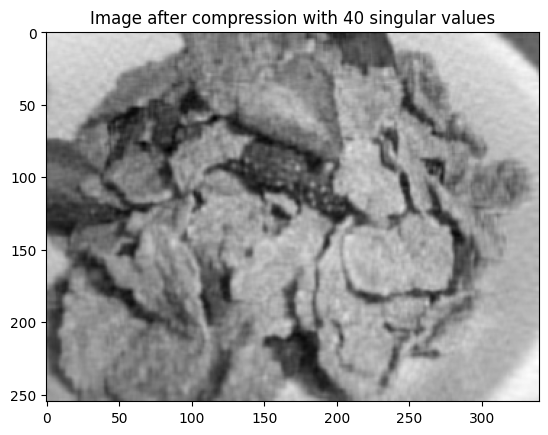

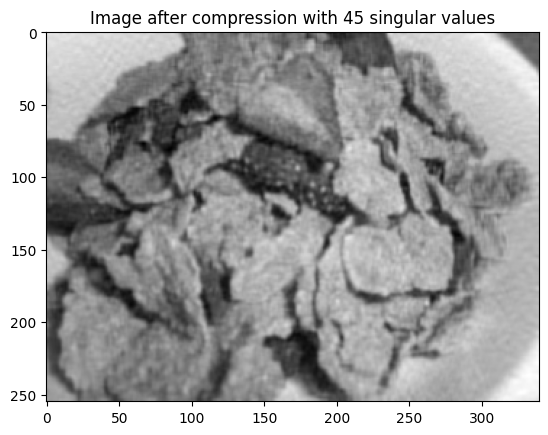

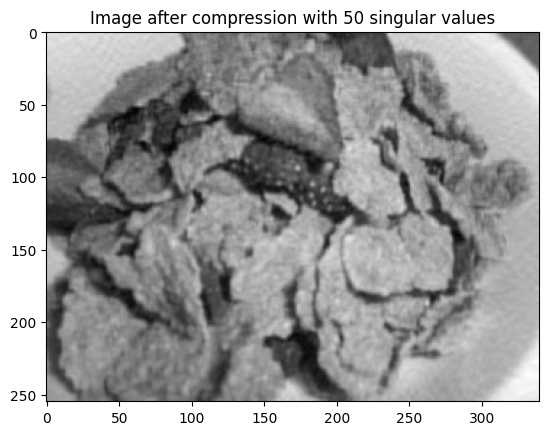

In [12]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path = 'test.jpg'

# 이미지 파일 열기
img = Image.open(path)

# 파일 크기 계산
s = float(os.path.getsize(path)) / 1000
print("Size(dimension): ",img.size)
plt.title("Original Image (%0.2f Kb):" %s)
plt.imshow(img)

# gray 스케일로 변환
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)

imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap='gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat)

# 5, 25, 45 개의 특이값을 적용하여 이미지 압축
for i in range(5, 51, 5):
  cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
  plt.imshow(cmpimg, cmap= 'gray')
  plt.title("Image after compression with %d singular values" %i)
  plt.show()
  result = Image.fromarray((cmpimg ).astype(np.uint8))
